In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-traffic-advection)


 In the following definition we allow the velocity $c$ to be specified as a parameter in the `ODEProblem`.

In [2]:
x, Dx, Dxx = FNC.diffper(300, [-4, 4])
f = lambda t, u: -c * (Dx @ u)

The following initial condition isn't mathematically periodic, but the deviation is less than machine precision. We specify RK4 as the solver.

In [3]:
from scipy.integrate import solve_ivp
u_init = 1 + exp(-3 * x**2)
c = 2
sol = solve_ivp(f, [0, 3.0], u_init, method="Radau", dense_output=True)

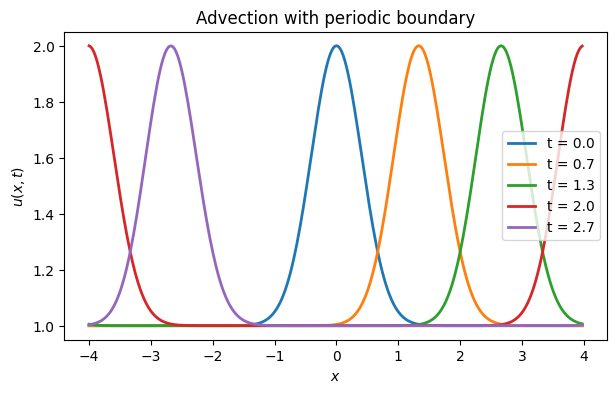

In [4]:
for t in arange(0, 3, 2/3):
    plot(x, sol.sol(t), label=f"t = {t:.1f}")
legend()
xlabel("$x$"),  ylabel("$u(x,t)$")
title("Advection with periodic boundary");

An animation shows the solution nicely. The bump moves with speed 2 to the right, reentering on the left as it exits to the right because of the periodic conditions.

In [5]:
from matplotlib.animation import FuncAnimation
fig, ax = subplots()
curve = ax.plot(x, u_init)[0]
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

ax.set_xlabel("$x$")
ax.set_ylabel("$u(x,t)$")
ax.set_ylim(0.9, 2.1)
ax.set_title("Advection equation with periodic boundary")

def snapshot(t):
    curve.set_ydata(sol.sol(t))
    time_text.set_text(f"t = {t:.2f}")

anim = FuncAnimation(fig, snapshot, frames=linspace(0, 3, 201))
anim.save("advection-periodic.mp4", fps=30)
close()